In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicSpline
from scipy.linalg import solve

## Zadanie 1

In [ ]:
h = np.array([0, 3, 6])
rho = np.array([1.225, 0.905, 0.652])

rho_h_scipy = lagrange(h, rho)
print(rho_h_scipy)

          2
0.003722 x - 0.1178 x + 1.225


In [16]:
def lagrange_coefficients(x, y):
    n = len(x)
    coeffs = np.zeros(n)

    for i in range(n):
        poly = np.poly1d([1])
        denom = 1
        for j in range(n):
            if i != j:
                poly *= np.poly1d([1, -x[j]])
                denom *= (x[i] - x[j])
        coeffs += y[i] * poly.coeffs / denom

    return coeffs

print(lagrange_coefficients(h, rho))

[ 0.00372222 -0.11783333  1.225     ]


## Zadanie 2

In [3]:
Re = np.array([0.2, 2, 20, 200, 2000, 20000])
cD = np.array([103, 13.9, 2.72, 0.8, 0.401, 0.433])

spline = CubicSpline(Re, cD, bc_type='natural')

Re_answer = np.array([5, 50, 5000])
cD_answer = spline(Re_answer)
print(Re_answer)
print(cD_answer)

[   5   50 5000]
[ -88.94021032  458.28842121 9920.95571242]


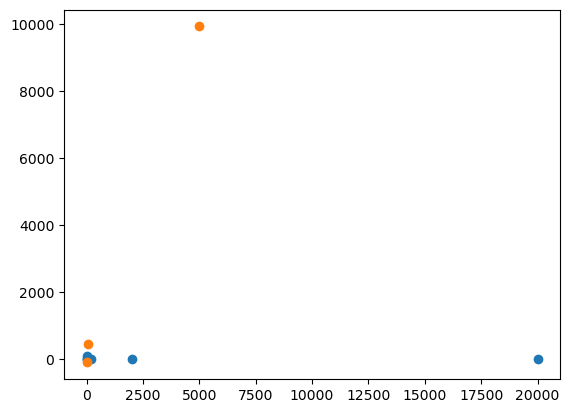

In [5]:
plt.scatter(Re, cD)
plt.scatter(Re_answer, cD_answer)

## Zadanie 3

In [7]:
def my_lagrange(x, X, Y):
    n = len(X)
    y = 0
    for i in range(n):
        w = 1.0
        for j in range(n):
            if i != j:
                w *= (x-X[j])/(X[i]-X[j])
        y += w*Y[i]
    return y

In [11]:
cD_answer_task3 = [my_lagrange(i, Re, cD) for i in Re_answer]
print(cD_answer_task3)

scipy_lagrange = lagrange(Re, cD)
cD_answer_task3_scipy = [scipy_lagrange(i) for i in Re_answer]
print(cD_answer_task3_scipy)

[-96.10046207185482, 2581.144117967352, 1658455172.0855002]
[-96.10046207185492, 2581.14411796735, 1658455172.0854998]


## Zadanie 4

In [23]:
X = np.array([1.2, 2.8, 4.3, 5.4, 6.8, 7.9])
Y = np.array([7.5, 16.1, 38.9, 67.0, 146.6, 266.2])

Y_log = np.log(Y)

3.7888579604822272 0.5365836969710379
2.0991601104991817


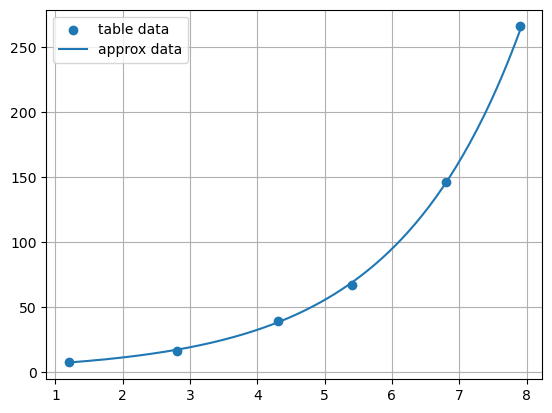

In [24]:
b, A = np.polyfit(X, Y_log, deg=1)
a = np.exp(A)
print(a, b)


Y_fit = a*np.exp(X*b)
std = np.sqrt(np.sum((Y - Y_fit)**2)/(len(Y)-2))
print(std)

xs = np.linspace(min(X), max(X), 200)
f = a*np.exp(xs*b)
plt.scatter(X, Y, label="table data")
plt.plot(xs, f, label="approx data")
plt.legend()
plt.grid()

In [54]:
def mnk(X, Y):
    avg_x = np.mean(X)
    avg_y = np.mean(Y)
    a = np.sum((X - avg_x)*(Y - avg_y))/np.sum((X - avg_x)**2)
    b = avg_y - a*avg_x
    return a, b

3.7888579604822263 0.5365836969710379
2.0991601104992066


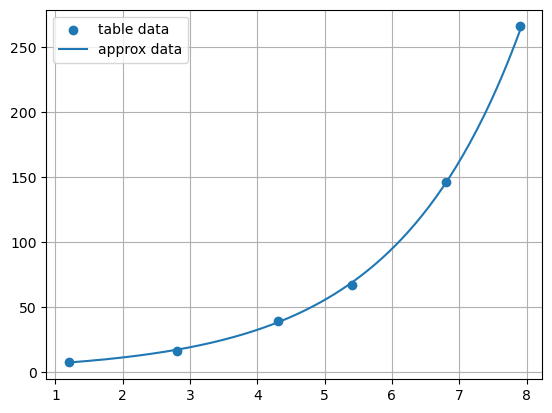

In [28]:
b, A = mnk(X, Y_log)
a = np.exp(A)
print(a, b)


Y_fit = a*np.exp(X*b)
std = np.sqrt(np.sum((Y - Y_fit)**2)/(len(Y)-2))
print(std)

xs = np.linspace(min(X), max(X), 200)
f = a*np.exp(xs*b)
plt.scatter(X, Y, label="table data")
plt.plot(xs, f, label="approx data")
plt.legend()
plt.grid()

## Zadanie 5

In [26]:
T = np.array([0, 21.1, 37.8, 54.4, 71.1, 87.8, 100])
muk = np.array([1.79, 1.13, 0.696, 0.519, 0.338, 0.321, 0.296])

a, b, c, d = np.polyfit(T, muk, deg=3)

coeffs = np.array([a, b, c, d])
print(coeffs)

[-8.45886166e-07  3.28569164e-04 -3.93212797e-02  1.79570895e+00]


In [27]:
T_answer = np.array([10, 30, 60, 90])

muk_answer = [np.polyval(coeffs, i) for i in T_answer]
print(T_answer)
print(muk_answer)

[10 30 60 90]
[1.4345071783718337, 0.888943874512138, 0.4365697400924058, 0.3015529833900541]


In [48]:
def full_mnk(X, Y, deg):
    A = np.zeros((deg+1, deg+1))
    B = np.zeros((deg+1))
    for i in range(deg+1):
        B[i] = np.sum(Y*X**i)
        for j in range(deg+1):
            A[i][j] = np.sum(X**(i+j))
    result = solve(A, B)
    return result[::-1]

result = full_mnk(T, muk, 3)
print(result)

[-8.45886166e-07  3.28569164e-04 -3.93212797e-02  1.79570895e+00]


In [52]:
def f(x, coeffs):
    n = len(coeffs)
    w = 0
    for i in range(n):
        w += coeffs[i]*x**(n-i-1)
    return w

muk_answer = [f(j, result) for j in T_answer]
print(T_answer)
print(muk_answer)

[10 30 60 90]
[1.4345071783718426, 0.8889438745121616, 0.4365697400923969, 0.3015529833900441]


## Zadanie 6

[ 9.43854354 -6.18989525]
30.201471900791567
[ 2.10811822 -1.06889613  4.40567377]
3.304259349317637


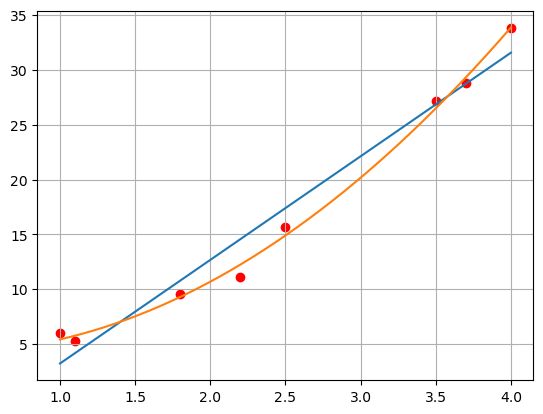

In [59]:
X = np.array([1.0, 2.5, 3.5, 4.0, 1.1, 1.8, 2.2, 3.7])
Y =  np.array([6.008, 15.722, 27.13, 33.772, 5.257, 9.549, 11.098, 28.828])

a_lin, b_lin = np.polyfit(X, Y, deg=1)
coeffs_lin = np.array([a_lin, b_lin])
print(coeffs_lin)

Y_lin_fit = [f(j, coeffs_lin) for j in X]

RSS_lin = np.sum((Y-Y_lin_fit)**2)
print(RSS_lin)

a_sq, b_sq, c = np.polyfit(X, Y, deg=2)
coeffs_sq = np.array([a_sq, b_sq, c])
print(coeffs_sq)

Y_sq_fit = [f(j, coeffs_sq) for j in X]

RSS_sq = np.sum((Y-Y_sq_fit)**2)
print(RSS_sq)

xs = np.linspace(min(X), max(X), 200)
plt.plot(xs, np.polyval(coeffs_lin, xs))
plt.plot(xs, np.polyval(coeffs_sq, xs))
plt.scatter(X, Y, color='red')
plt.grid()

[ 9.43854354 -6.18989525]
30.201471900791567
[ 2.10811822 -1.06889613  4.40567377]
3.3042593493176406


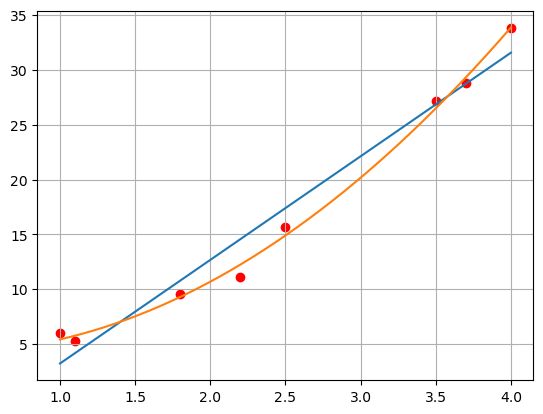

In [60]:
a_lin, b_lin = mnk(X, Y)
coeffs_lin = np.array([a_lin, b_lin])
print(coeffs_lin)

Y_lin_fit = [f(j, coeffs_lin) for j in X]

RSS_lin = np.sum((Y-Y_lin_fit)**2)
print(RSS_lin)

coeffs_sq = full_mnk(X, Y, deg=2)
print(coeffs_sq)

Y_sq_fit = [f(j, coeffs_sq) for j in X]

RSS_sq = np.sum((Y-Y_sq_fit)**2)
print(RSS_sq)

xs = np.linspace(min(X), max(X), 200)
plt.plot(xs, np.polyval(coeffs_lin, xs))
plt.plot(xs, np.polyval(coeffs_sq, xs))
plt.scatter(X, Y, color='red')
plt.grid()